In [15]:
from utils import *
from torchvision import datasets
import torchvision.transforms as T
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
seed = 42
data_path = 'C:/Studia/ZPD/Projekt/Polish-Coins-Classification/data/'
raw_data_path = 'C:/Users/melehean/Desktop/monety_train_test/ZPD dataset/'

train_data_path = data_path + 'train'
test_data_path = data_path + 'test'
difficult_test_data_path = data_path + 'difficult_test'

train_data_object = datasets.ImageFolder(train_data_path)
test_data_object = datasets.ImageFolder(test_data_path)
difficult_test_data_object = datasets.ImageFolder(difficult_test_data_path)

In [5]:
resolution_dictionary = count_resolution(raw_data_path)
print("Resolutions: ", resolution_dictionary)

Resolutions:  {(2136, 4624): 529, (2250, 4000): 313, (3024, 3024): 284}


In [6]:
datasets_paths_list = [train_data_path, test_data_path, difficult_test_data_path]
scale_all_images(datasets_paths_list)

In [7]:
k_fold_object = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

train_dictionary, val_dictionary = get_average_train_val_class_split(train_data_object, k_fold_object)

print("Train classes:", train_dictionary)
print("Validation classes:", val_dictionary)
print("Classes to indices:", train_data_object.class_to_idx)

Train classes: {0: 67, 1: 65, 2: 64, 3: 68, 4: 70, 5: 58, 6: 65, 7: 66, 8: 60}
Validation classes: {0: 17, 1: 16, 2: 16, 3: 17, 4: 17, 5: 15, 6: 16, 7: 16, 8: 15}
Classes to indices: {'10_groszy': 0, '1_grosz': 1, '1_zloty': 2, '20_groszy': 3, '2_grosze': 4, '2_zlote': 5, '50_groszy': 6, '5_groszy': 7, '5_zlotych': 8}


In [8]:
save_all_average_class_images(train_data_object)

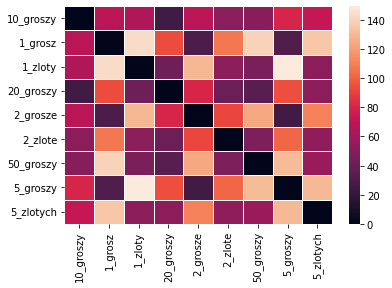

In [9]:
class_array = ['10_groszy', '1_grosz', '1_zloty', '20_groszy', '2_grosze', '2_zlote', '50_groszy', '5_groszy', '5_zlotych']

mse_matrix = calculate_mse_between_average_images(class_array)
ax = sns.heatmap(mse_matrix, linewidth=0.5, xticklabels=class_array, yticklabels=class_array)
plt.show()

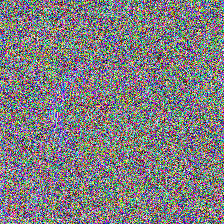

In [16]:
random_train_image = get_random_image(train_data_object)
tensor = normalize_image(random_train_image)
transform = T.ToPILImage()
img = transform(tensor)
img